# Projekt TSP (Travel Salesman Problem)
### Autorzy: Aleksander Folfas, Zosia Jaworksa, Maciej Komosa, Kajetan Łodej, Natalia Łyś

In [4]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [5]:
# Wczytanie plików z danymi
TSP_29 = pd.read_excel('Dane_TSP_29.xlsx', header=None)
TSP_48 = pd.read_excel('Dane_TSP_48.xlsx', header=None)
TSP_76 = pd.read_excel('Dane_TSP_76.xlsx', header=None)
TSP_127 = pd.read_excel('Dane_TSP_127.xlsx', header=None)


In [5]:
TSP_29.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,107,241,190,124,80,316,76,152,157,...,150,65,341,184,67,221,169,108,45,167
1,107,0,148,137,88,127,336,183,134,95,...,67,42,278,271,146,251,105,191,139,79
2,241,148,0,374,171,259,509,317,217,232,...,204,182,435,417,292,424,116,337,273,77
3,190,137,374,0,202,234,222,192,248,42,...,70,137,151,239,135,137,242,165,228,205
4,124,88,171,202,0,61,392,202,46,160,...,155,65,366,300,175,307,57,220,121,97


## Tabu Search
### TSP_48

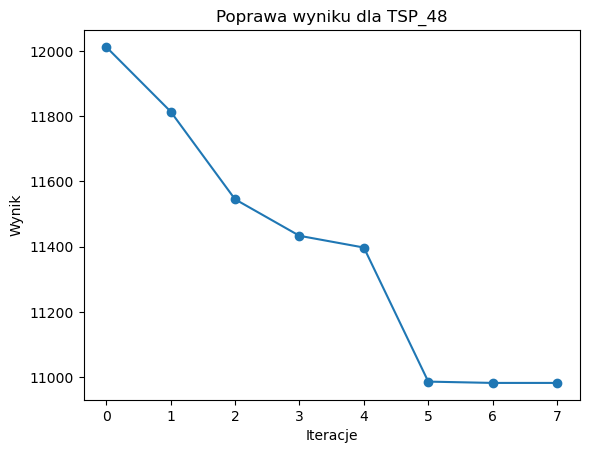

In [3]:
# Wykres poprawy wyniku dla TSP_48 z trasą początkową utworzoną przez NN

values = [12012, 11814, 11545, 11433, 11397, 10986, 10982, 10982] # Wyniki
x = [0, 1, 2, 3, 4, 5, 6, 7] # Iteracje
plt.plot(x, values, 'o-')
plt.xlabel('Iteracje')
plt.ylabel('Wynik')
plt.title('Poprawa wyniku dla TSP_48')
plt.show()

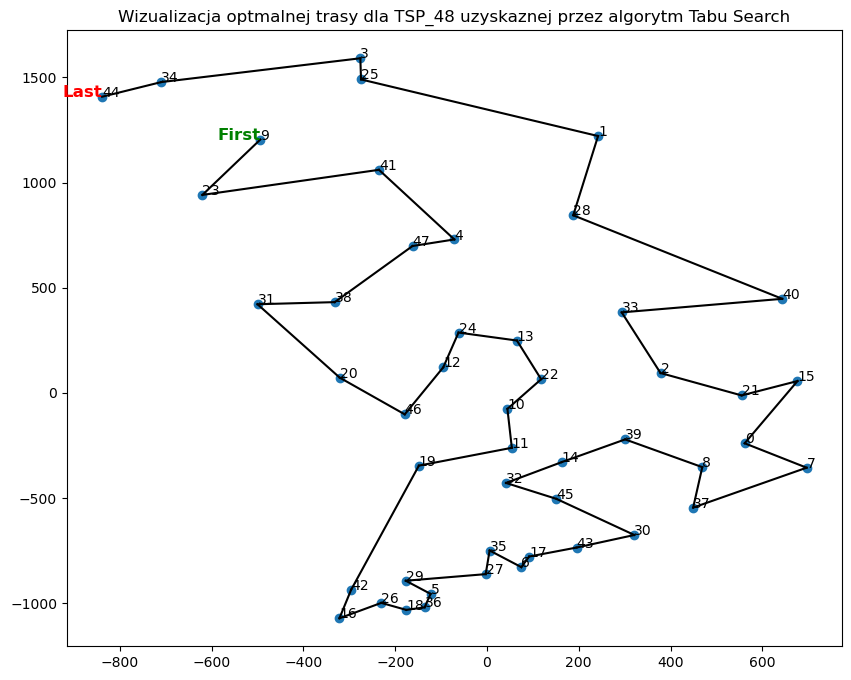

In [7]:
# Wizualizacja trasyt dla najlepszego rozwiazania TSP_48
route = [9, 23, 41, 4, 47, 38, 31, 20, 46, 12, 24, 13, 22, 10, 11, 19, 42, 16, 26, 18, 36, 5, 29, 27, 35, 6, 17, 43, 30, 45, 32, 14, 39, 8, 37, 7, 0, 15, 21, 2, 33, 40, 28, 1, 25, 3, 34, 44] # Trasa

# MDS - Multidimensional Scaling 
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42,normalized_stress='auto')
coordinates = mds.fit_transform(TSP_48)

# Wykres
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1])

# Dodanie numerów miast
for i, txt in enumerate(range(len(coordinates))):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]))

# Narysowanie trasy
for i in range(len(route) - 1):
    plt.plot([coordinates[route[i], 0], coordinates[route[i + 1], 0]],
             [coordinates[route[i], 1], coordinates[route[i + 1], 1]], 'k-')

# Podpisanie pierwszego i ostatniego miasta (po odwiedzeniu ostatniego miasta nastepuje powrót do pierwszego )
plt.text(coordinates[route[0], 0], coordinates[route[0], 1], 'First', fontsize=12, ha='right', color='green', weight='bold')
plt.text(coordinates[route[-1], 0], coordinates[route[-1], 1], 'Last', fontsize=12, ha='right', color='red', weight='bold')

plt.title('Wizualizacja optmalnej trasy dla TSP_48 uzyskaznej przez algorytm Tabu Search')
plt.show()